In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = 'C:/Users/LENOVO/Downloads/myexcel - myexcel.csv.csv'
data = pd.read_csv('C:/Users/LENOVO/Downloads/myexcel - myexcel.csv.csv')
# Display the first few rows of the dataset to understand its structure
data.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [22]:
# Group by 'team' and count the number of employees in each team
team_distribution = data['Team'].value_counts().reset_index()
team_distribution.columns = ['Team', 'count']
# Calculate the percentage split
total_employees = team_distribution['count'].sum()
team_distribution['percentage'] = (team_distribution['count'] / total_employees) * 100

# Display the result
print(team_distribution)


                      Team  count  percentage
0     New Orleans Pelicans     19    4.148472
1        Memphis Grizzlies     18    3.930131
2                Utah Jazz     16    3.493450
3          New York Knicks     16    3.493450
4          Milwaukee Bucks     16    3.493450
5            Brooklyn Nets     15    3.275109
6   Portland Trail Blazers     15    3.275109
7    Oklahoma City Thunder     15    3.275109
8           Denver Nuggets     15    3.275109
9       Washington Wizards     15    3.275109
10              Miami Heat     15    3.275109
11       Charlotte Hornets     15    3.275109
12           Atlanta Hawks     15    3.275109
13       San Antonio Spurs     15    3.275109
14         Houston Rockets     15    3.275109
15          Boston Celtics     15    3.275109
16          Indiana Pacers     15    3.275109
17         Detroit Pistons     15    3.275109
18     Cleveland Cavaliers     15    3.275109
19           Chicago Bulls     15    3.275109
20        Sacramento Kings     15 

In [24]:
# 2. Segregate employees based on their positions within the company
position_distribution = data['Position'].value_counts().reset_index()
position_distribution.columns = ['Position', 'Count']
total_employees = position_distribution['Count'].sum()
position_distribution['Percentage'] = (position_distribution['Count'] / total_employees) * 100



In [25]:
print(position_distribution)
position_distribution.to_csv('C:/Users/LENOVO/Downloads/position_distribution.csv', index=False)
print(position_distribution)


  Position  Count  Percentage
0       SG    102   22.270742
1       PF    100   21.834061
2       PG     92   20.087336
3       SF     85   18.558952
4        C     79   17.248908
  Position  Count  Percentage
0       SG    102   22.270742
1       PF    100   21.834061
2       PG     92   20.087336
3       SF     85   18.558952
4        C     79   17.248908


In [26]:
# 3. Identify the predominant age group among employees.
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)


In [27]:
age_group_distribution = data['Age Group'].value_counts().reset_index()
age_group_distribution.columns = ['Age Group', 'Count']
predominant_age_group = age_group_distribution.loc[age_group_distribution['Count'].idxmax()]


In [28]:
print("Age Group Distribution:")
print(age_group_distribution)
print("\nPredominant Age Group:")
print(predominant_age_group)


Age Group Distribution:
  Age Group  Count
0     20-29    334
1     30-39    119
2     40-49      3
3       <20      2
4     50-59      0
5       60+      0

Predominant Age Group:
Age Group    20-29
Count          334
Name: 0, dtype: object


In [29]:
# 4. Discover which team and position have the highest salary expenditure. 
if {'Team', 'Position', 'Salary'}.issubset(data.columns):
    salary_expenditure = data.groupby(['Team', 'Position'])['Salary'].sum().reset_index()
salary_expenditure.columns = ['Team', 'Position', 'Total Salary']
highest_salary_expenditure = salary_expenditure.loc[salary_expenditure['Total Salary'].idxmax()]
print("Salary Expenditure by Team and Position:")
print(salary_expenditure)
print("\nTeam and Position with the Highest Salary Expenditure:")
print(highest_salary_expenditure)



Salary Expenditure by Team and Position:
                   Team Position  Total Salary
0         Atlanta Hawks        C    22756250.0
1         Atlanta Hawks       PF    23952268.0
2         Atlanta Hawks       PG     9763400.0
3         Atlanta Hawks       SF     6000000.0
4         Atlanta Hawks       SG    10431032.0
..                  ...      ...           ...
144  Washington Wizards        C    24490429.0
145  Washington Wizards       PF    11300000.0
146  Washington Wizards       PG    18022415.0
147  Washington Wizards       SF    11158800.0
148  Washington Wizards       SG    11356992.0

[149 rows x 3 columns]

Team and Position with the Highest Salary Expenditure:
Team            Los Angeles Lakers
Position                        SF
Total Salary            31866445.0
Name: 67, dtype: object


Correlation between Age and Salary: 0.21400941226570985


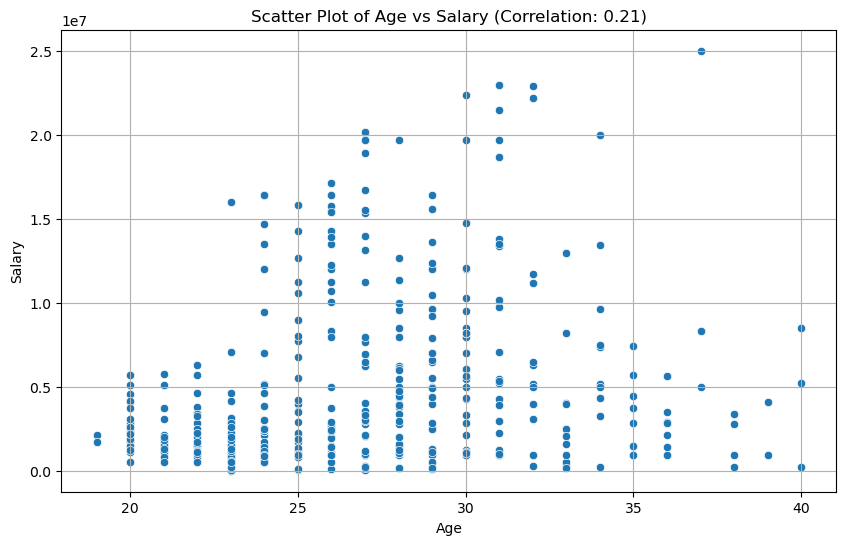

In [31]:
# 5. Investigate if there's any correlation between age and salary, and represent it visually. 
if {'Age', 'Salary'}.issubset(data.columns):
    correlation = data['Age'].corr(data['Salary'])
    print(f"Correlation between Age and Salary: {correlation}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title(f'Scatter Plot of Age vs Salary (Correlation: {correlation:.2f})')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


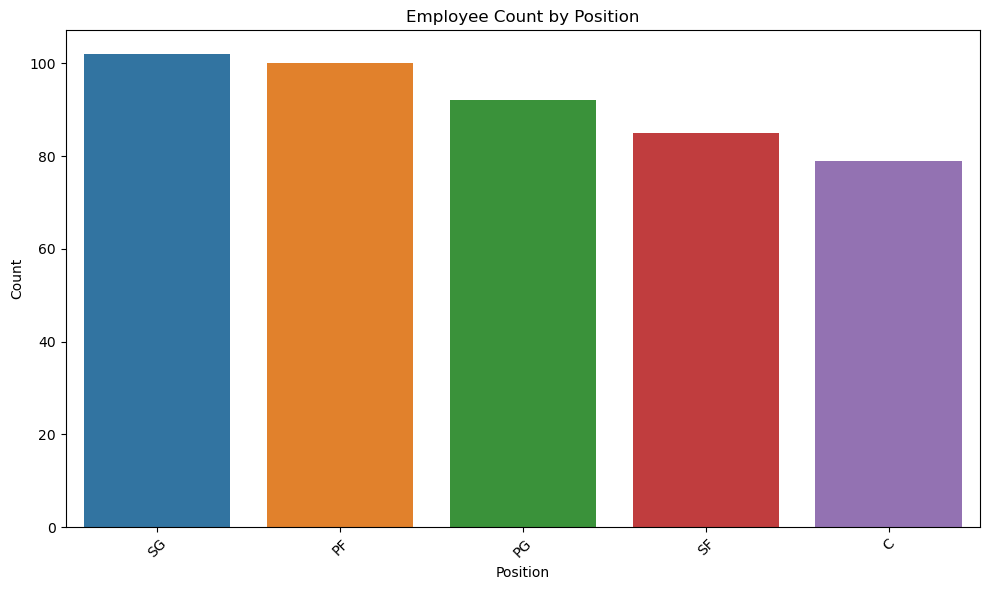

In [32]:
# For each of the five analysis tasks, create appropriate visualizations to present your findings effectively. 
# task1
position_counts = data['Position'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title('Employee Count by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


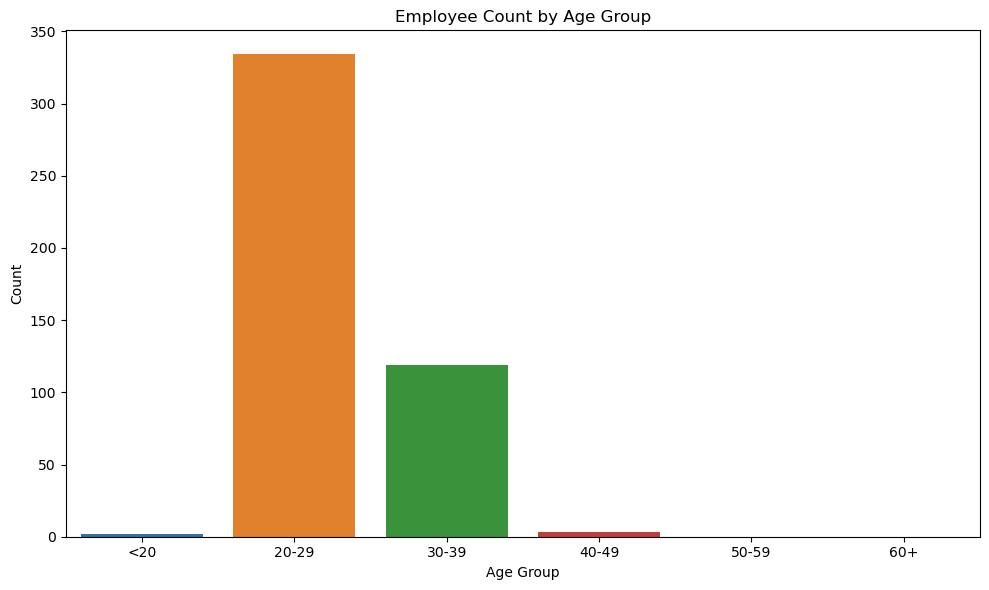

In [33]:
# task2
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
age_group_counts = data['Age Group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Employee Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


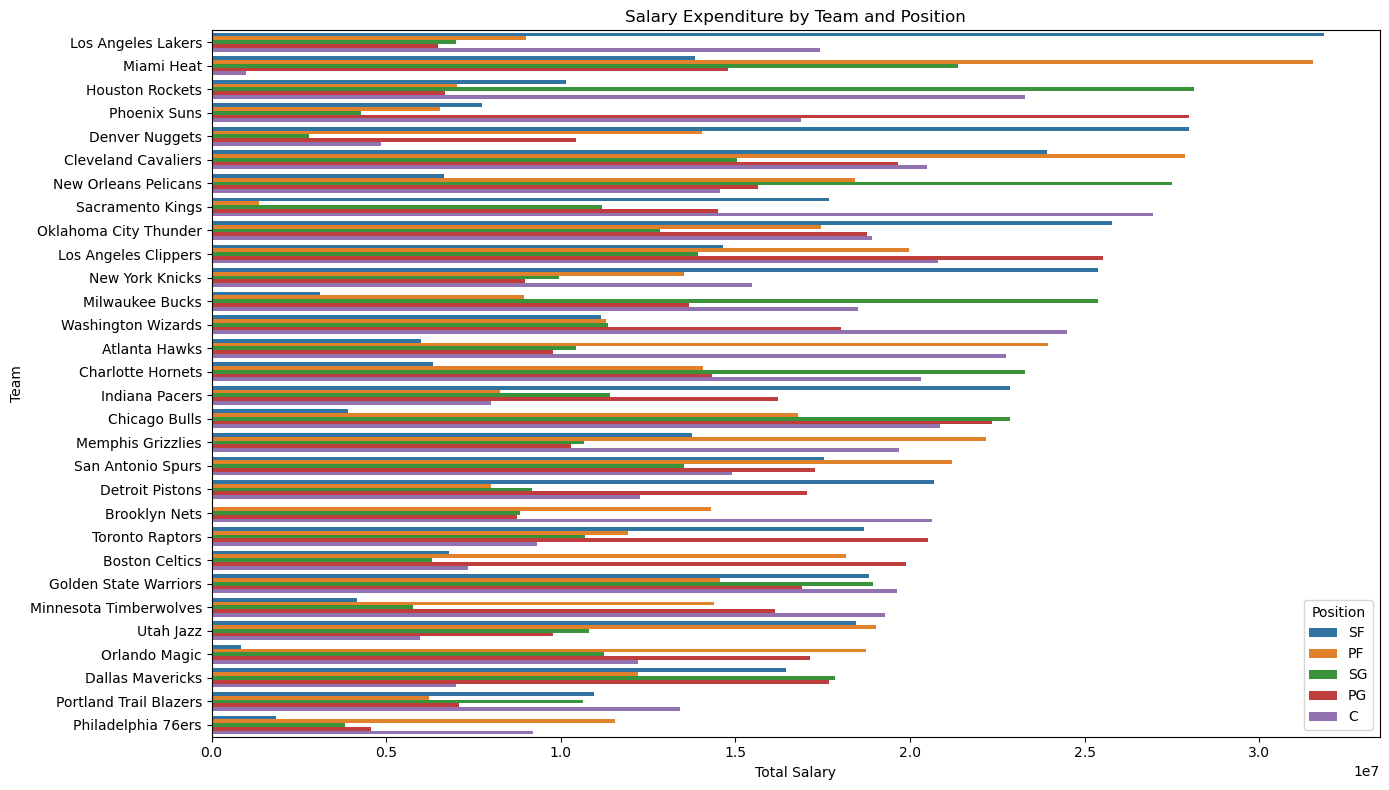

In [34]:
# task3
salary_expenditure = data.groupby(['Team', 'Position'])['Salary'].sum().reset_index()
salary_expenditure.columns = ['Team', 'Position', 'Total Salary']
salary_expenditure = salary_expenditure.sort_values(by='Total Salary', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Salary', y='Team', hue='Position', data=salary_expenditure)
plt.title('Salary Expenditure by Team and Position')
plt.xlabel('Total Salary')
plt.ylabel('Team')
plt.legend(title='Position')
plt.tight_layout()
plt.show()


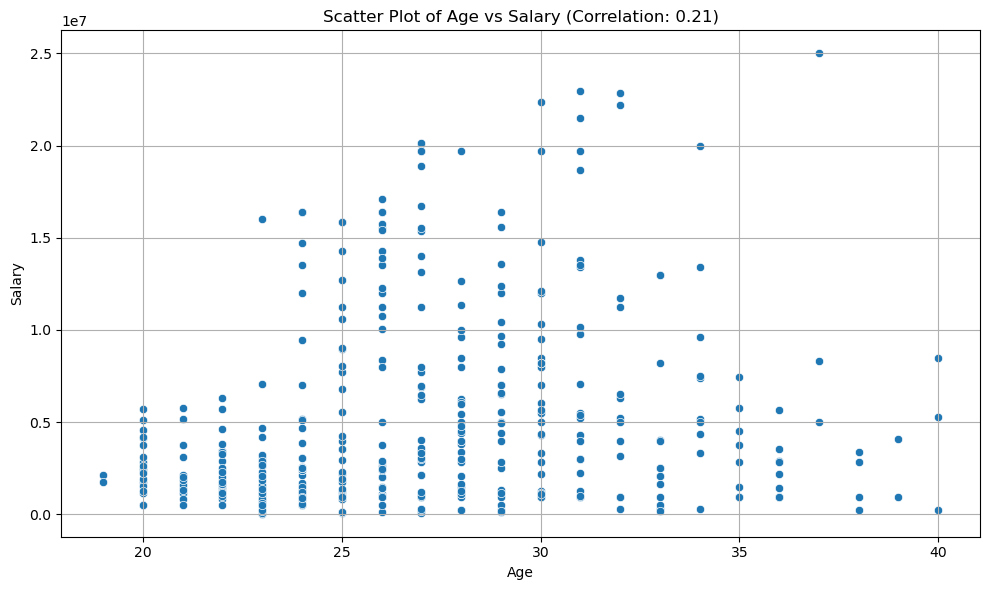

In [35]:
# task4
correlation = data['Age'].corr(data['Salary'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title(f'Scatter Plot of Age vs Salary (Correlation: {correlation:.2f})')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()
